In [1]:
import pandas as pd
from sklearn.neural_network import MLPRegressor

In [2]:
dataDirectory = "/windows-downloads/"
filenameEnding = ".csv.bz2"
filename = dataDirectory + "2008" + filenameEnding

In [3]:
a = pd.read_csv(filename)

In [152]:
#from sklearn.utils.random import sample_without_replacement
a = a.sample(n=500000)

In [153]:
a.count()
# a = a.dropna(axis = 0, how = 'any') #remove nans (only records not entire columns)

Year                 500000
Month                500000
DayofMonth           500000
DayOfWeek            500000
DepTime              490223
CRSDepTime           500000
ArrTime              489128
CRSArrTime           500000
UniqueCarrier        500000
FlightNum            500000
TailNum              494065
ActualElapsedTime    488910
CRSElapsedTime       499937
AirTime              488910
ArrDelay             488910
DepDelay             490223
Origin               500000
Dest                 500000
Distance             500000
TaxiIn               489128
TaxiOut              490174
Cancelled            500000
CancellationCode       9855
Diverted             500000
CarrierDelay         108877
WeatherDelay         108877
NASDelay             108877
SecurityDelay        108877
LateAircraftDelay    108877
dtype: int64

In [68]:
a.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [53]:
a.dtypes
a.head(5)

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
4043960  2008      7          14          1   1611.0        1540   1754.0   
2868177  2008      5          19          1   1842.0        1835   2158.0   
5375388  2008      9           8          1   2323.0        2122     17.0   
3378590  2008      6           2          1   1816.0        1825   1929.0   
5910459  2008     10          19          7   1500.0        1459   1746.0   

         CRSArrTime UniqueCarrier  FlightNum        ...         TaxiIn  \
4043960        1745            MQ       4896        ...            6.0   
2868177        2150            AA        223        ...           14.0   
5375388        2227            DL        797        ...            4.0   
3378590        1935            MQ       3146        ...           10.0   
5910459        1749            CO        792        ...            3.0   

         TaxiOut  Cancelled  CancellationCode  Diverted  CarrierDelay  \
4043960     17.0          0               NaN         0           NaN   
2868177     26.0          0               NaN         0           NaN   
5375388     11.0          0               NaN         0           0.0   
3378590     10.0          0               NaN         0           NaN   
5910459     44.0          0               NaN         0           NaN   

        WeatherDelay NASDelay  SecurityDelay  LateAircraftDelay  
4043960          NaN      NaN            NaN                NaN  
2868177          NaN      NaN            NaN                NaN  
5375388          0.0      0.0            0.0              110.0  
3378590          NaN      NaN            NaN                NaN  
5910459          NaN      NaN            NaN                NaN  

[5 rows x 29 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef3aae8c18>]],
      dtype=object)

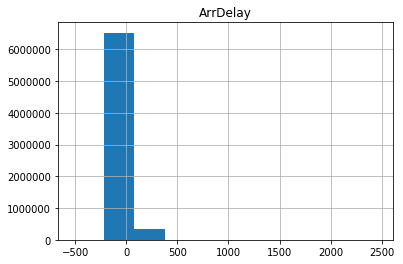

In [21]:
a.hist(column='ArrDelay')

In [34]:
a_common = a[(a.ArrDelay < 150) & (a.ArrDelay > -50)]

In [35]:
a_common.shape

(6757596, 29)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef3a8985c0>]],
      dtype=object)

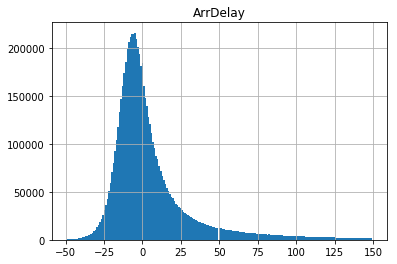

In [38]:
a_common.hist(column='ArrDelay',bins=200)

In [39]:
a.DayOfWeek.corr(a.ArrDelay)

0.010558428340688675

In [40]:
a[['UniqueCarrier','ArrDelay']].groupby(a.UniqueCarrier).mean()

ArrDelay
UniqueCarrier           
9E              4.111135
AA             12.607194
AQ             -2.888674
AS              4.804346
B6             11.084184
CO             10.979037
DL              7.855163
EV             10.208002
F9              6.108247
FL              9.091375
HA              1.264409
MQ              9.890668
NW              7.368539
OH             11.817468
OO              6.598885
UA             11.291322
US              2.848110
WN              5.179678
XE             10.635405
YV             11.775181

In [41]:
categoricalColumns = ['UniqueCarrier'] # 'Origin','Dest','FlightNum' 'TailNum'
numericCols = ['Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','CRSElapsedTime']
Xcols = categoricalColumns + numericCols
ycols = ['ArrDelay']

In [57]:
import numpy as np

In [42]:
#import numpy as np
#a = a[np.isfinite(a[numericCols + ycols])]
# a[numericCols + ycols].notnull().head()
b = a.dropna(axis=0,subset=numericCols+ycols,how='any')

In [43]:
a = b
del b

In [44]:
X = a[Xcols]
y = a[ycols]

In [45]:
a.count()

Year                 6855029
Month                6855029
DayofMonth           6855029
DayOfWeek            6855029
DepTime              6855029
CRSDepTime           6855029
ArrTime              6855029
CRSArrTime           6855029
UniqueCarrier        6855029
FlightNum            6855029
TailNum              6855024
ActualElapsedTime    6855029
CRSElapsedTime       6855029
AirTime              6855029
ArrDelay             6855029
DepDelay             6855029
Origin               6855029
Dest                 6855029
Distance             6855029
TaxiIn               6855029
TaxiOut              6855029
Cancelled            6855029
CancellationCode           0
Diverted             6855029
CarrierDelay         1524735
WeatherDelay         1524735
NASDelay             1524735
SecurityDelay        1524735
LateAircraftDelay    1524735
dtype: int64

In [27]:
a.notna().count()

UniqueCarrier     7009728
Origin            7009728
Dest              7009728
Month             7009728
DayofMonth        7009728
DayOfWeek         7009728
CRSDepTime        7009728
CRSArrTime        7009728
CRSElapsedTime    7009728
ArrDelay          7009728
dtype: int64

In [46]:
a.notnull().count()

Year                 6855029
Month                6855029
DayofMonth           6855029
DayOfWeek            6855029
DepTime              6855029
CRSDepTime           6855029
ArrTime              6855029
CRSArrTime           6855029
UniqueCarrier        6855029
FlightNum            6855029
TailNum              6855029
ActualElapsedTime    6855029
CRSElapsedTime       6855029
AirTime              6855029
ArrDelay             6855029
DepDelay             6855029
Origin               6855029
Dest                 6855029
Distance             6855029
TaxiIn               6855029
TaxiOut              6855029
Cancelled            6855029
CancellationCode     6855029
Diverted             6855029
CarrierDelay         6855029
WeatherDelay         6855029
NASDelay             6855029
SecurityDelay        6855029
LateAircraftDelay    6855029
dtype: int64

In [82]:
def get_digit(number, n):
    return number // 10**n % 10

In [83]:
get_digit(987654321, 0)

1

In [84]:
def get_seconds(hhmm):
    minutes = get_digit(hhmm,0) + get_digit(hhmm,1)*10
    hours = get_digit(hhmm,2) + get_digit(hhmm,3)*10
    seconds = minutes*60 + hours*3600
    return seconds

In [85]:
get_seconds(2)

120

In [86]:
get_seconds(10)

600

In [87]:
get_seconds(101)

3660

In [88]:
get_seconds(1310)

47400

In [96]:
def get_timeofdayvec(hhmm):
    s = get_seconds(hhmm)
    angle = 2*np.pi*s/86400
    x = np.sin(angle)
    y = np.cos(angle)
    return np.array([x,y])

In [97]:
get_timeofdayvec(0)

array([0., 1.])

In [98]:
get_timeofdayvec(2359)

array([-0.00436331,  0.99999048])

In [102]:
get_timeofdayvec(X[:,23]).T.shape

(1, 6855029, 2)

In [47]:
from sklearn import preprocessing

In [48]:
enc = preprocessing.OneHotEncoder()

In [49]:
enc.fit(a[categoricalColumns])

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [161]:
import sklearn

In [16]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.3.


In [50]:
enc.categories_

[array(['9E', 'AA', 'AQ', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA',
        'MQ', 'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV'], dtype=object)]

In [51]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    [('enc', preprocessing.OneHotEncoder(sparse=False), categoricalColumns),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)

In [52]:
X = ct.fit_transform(X)

In [53]:
X.shape

(6855029, 26)

In [54]:
y.shape

(6855029, 1)

In [55]:
from numpy import cov

In [58]:
XandY = np.concatenate((X,y),axis=1)

In [59]:
cov(XandY,rowvar=False).shape

(27, 27)

In [60]:
y

ArrDelay
0           -14.0
1             2.0
2            14.0
3            -6.0
4            34.0
5            11.0
6            57.0
7           -18.0
8             2.0
9           -16.0
10            1.0
11           80.0
12            1.0
13           10.0
14           -4.0
15           11.0
16           15.0
17          -15.0
18           16.0
19           37.0
20           -3.0
21           19.0
22            6.0
23           -7.0
24           -8.0
25           14.0
26           47.0
27            4.0
28          -24.0
29          -22.0
...           ...
7009698     -14.0
7009699      21.0
7009700     -13.0
7009701      38.0
7009702      -1.0
7009703       1.0
7009704     -18.0
7009705      64.0
7009706      -3.0
7009707      -5.0
7009708      13.0
7009709      17.0
7009710      25.0
7009711      -8.0
7009712       4.0
7009713     -22.0
7009714      -4.0
7009715      19.0
7009716      -5.0
7009717      75.0
7009718      99.0
7009719      15.0
7009720       6.0
7009721      16.0
7009722       2.0
7009723      14.0
7009724      -2.0
7009725       0.0
7009726       9.0
7009727      -5.0

[6855029 rows x 1 columns]

In [61]:
XandY

array([[ 0.000e+00,  0.000e+00,  0.000e+00, ...,  2.225e+03,  1.500e+02,
        -1.400e+01],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  1.000e+03,  1.450e+02,
         2.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  7.500e+02,  9.000e+01,
         1.400e+01],
       ...,
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  8.560e+02,  1.160e+02,
         0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  1.437e+03,  1.170e+02,
         9.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  1.418e+03,  1.350e+02,
        -5.000e+00]])

In [237]:
cov(XandY,rowvar=False)

array([[ 3.56998768e-02, -3.16934380e-03, -4.04935899e-05,
        -8.08810169e-04, -1.02796087e-03, -1.59320285e-03,
        -2.38608858e-03, -1.49962778e-03, -5.20653536e-04,
        -1.40332280e-03, -3.28726053e-04, -2.54123817e-03,
        -1.86854410e-03, -1.02909833e-03, -2.96498009e-03,
        -2.36986081e-03, -2.43226947e-03, -6.42392130e-03,
        -1.97425209e-03, -1.31748246e-03,  4.63536255e-03,
        -1.42136815e-03, -1.36200433e-04,  5.20063750e-01,
         2.10340066e-01, -1.05584733e+00, -1.46086262e-01],
       [-3.16934380e-03,  7.81783711e-02, -9.33702742e-05,
        -1.86495757e-03, -2.37027610e-03, -3.67361322e-03,
        -5.50185215e-03, -3.45784746e-03, -1.20052491e-03,
        -3.23578707e-03, -7.57977788e-04, -5.85959669e-03,
        -4.30849612e-03, -2.37289886e-03, -6.83666240e-03,
        -5.46443410e-03, -5.60833623e-03, -1.48123023e-02,
        -4.55223800e-03, -3.03785608e-03,  5.33097317e-03,
         6.76378650e-03,  2.56089537e-03, -9.23458382e-

In [62]:
XandYasPd = pd.DataFrame(data=XandY)

In [63]:
XandYasPd

0    1    2    3    4    5    6    7    8    9   ...    17   18  \
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
5        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
6        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
7        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
8        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
9        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
10       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
11       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
12       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
13       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
14       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
15       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
16       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
17       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
18       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
19       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
20       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
21       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
22       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
23       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
24       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
25       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
26       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
27       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
28       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
29       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   1.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   
6854999  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855000  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855001  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855002  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855003  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855004  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855005  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855006  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855007  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855008  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855009  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855010  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855011  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855012  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855013  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855014  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855015  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855016  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855017  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
6855018  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0  0.0   
685501

In [70]:
XandYcorrs = XandYasPd.corr()

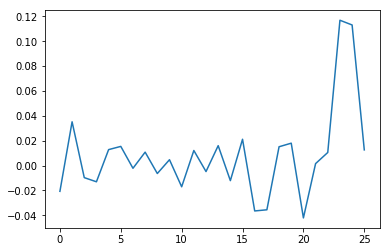

In [81]:
XandYcorrs.loc[26,0:25].plot()

In [246]:
# it is clear that element 23 and 24 (time of day) is most strongly correlated with delay.
# Therefore those values will be tried separately as well
X2 = X[:,[23,24]]

In [247]:
X2

array([[1355., 1540.],
       [1723., 1805.],
       [1400., 1522.],
       ...,
       [  35.,  638.],
       [ 740.,  850.],
       [1626., 1741.]])

In [251]:
s = str(X2[0,0])

In [252]:
s

'1355.0'

In [272]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.33)

In [273]:
scaler2 = preprocessing.StandardScaler().fit(X2_train)

In [274]:
X2_train = scaler2.transform(X2_train)

In [263]:
X2_train

array([[-1.22895865, -0.99570139],
       [-0.47485891, -0.51496645],
       [ 0.6261267 ,  0.4319985 ],
       ...,
       [-0.20122844, -0.12747751],
       [-0.42099465, -0.13369391],
       [-1.23111322, -1.22778033]])

In [171]:
# del a # could be used to free data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [172]:
del X,y

In [173]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [174]:
X_train = scaler.transform(X_train)

In [175]:
X_train

array([[-0.19512202, -0.3057904 , -0.03371839, ...,  1.2385288 ,
         0.92619997, -0.41645959],
       [-0.19512202, -0.3057904 , -0.03371839, ..., -0.9156942 ,
        -0.90936606, -0.20086844],
       [-0.19512202, -0.3057904 , -0.03371839, ...,  0.66765971,
         0.67523557,  2.22812515],
       ...,
       [-0.19512202, -0.3057904 , -0.03371839, ..., -1.5619611 ,
        -1.57307355, -0.4883233 ],
       [-0.19512202, -0.3057904 , -0.03371839, ..., -1.06648981,
         0.22723302,  2.07002497],
       [-0.19512202, -0.3057904 , -0.03371839, ..., -0.38790956,
        -0.35143695, -0.43083233]])

In [176]:
X_train.shape

(327569, 26)

In [112]:
from sklearn.decomposition import PCA

In [177]:
covar_matrix = PCA(n_components = 24) #we have 26 features, but I saw that 24 had enough

In [178]:
covar_matrix.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=24, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [179]:
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

In [180]:
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

In [181]:
var

array([ 6.9, 12.7, 17.2, 21.4, 25.6, 29.7, 33.8, 37.9, 42. , 46.1, 50.1,
       54.1, 58.1, 62.1, 66.1, 70.1, 74. , 77.9, 81.8, 85.7, 89.5, 93.3,
       96.9, 99.1])

In [182]:
import matplotlib.pyplot as plt

In [183]:
import seaborn as sb
%matplotlib inline

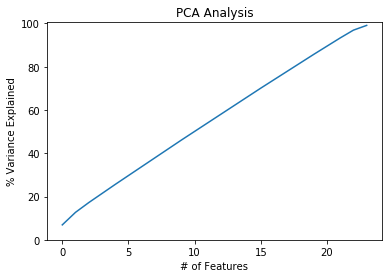

In [184]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [185]:
X_train_pca = covar_matrix.transform(X_train)

In [186]:
from sklearn.neural_network import MLPRegressor

In [187]:
reg = MLPRegressor()

In [275]:
yScaler = preprocessing.StandardScaler().fit(y_train)

In [276]:
y_train = yScaler.transform(y_train)

In [190]:
reg.fit(X_train_pca,y_train.ravel())

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [277]:
y_test = yScaler.transform(y_test)

In [192]:
X_test = scaler.transform(X_test)

In [193]:
X_test_pca = covar_matrix.transform(X_test)

In [194]:
reg.score(X_test_pca,y_test)

0.05412081663151447

In [195]:
y_train.shape

(327569, 1)

In [198]:
X_train_pca.shape

(327569, 24)

In [136]:
# score 5% is extremely poor
# alternative reasons: I make a mistake with the data. The model is not the right one. It is not possible with the selected data.

In [199]:
from sklearn import neighbors

In [200]:
knn = neighbors.KNeighborsRegressor(5, weights='uniform')

In [201]:
knn.fit(X_train_pca, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [202]:
knn.score(X_test_pca,y_test)

-0.050516476029243806

In [278]:
reg2 = MLPRegressor()

In [279]:
reg2.fit(X2_train,y_train)

/home/osboxes/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [280]:
X2_test = scaler2.transform(X2_test)
reg2.score(X2_test,y_test)

0.015989331635049675

In [271]:
y_train

array([[-0.03212823],
       [-0.4210736 ],
       [-0.29142514],
       ...,
       [-0.65444081],
       [-0.49886267],
       [-0.36921421]])